In [1]:
import xarray as xr
import glob
import numpy as np
import matplotlib.pyplot as plt

import cluster_SSL

import seaborn as sns

In [2]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

In [3]:
import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

## List files to extract SSL
The files used in Tromsøflaket analysis are 21st to 29th.

In [4]:
flist = glob.glob('F:GLIDER2018/Echosounder/Echosounder/nc_files/GLIDER_SB_2018_v5-Phase0-D2018062*-?.nc')
flist = flist[6:]
flist

['F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180621-T080104-0.nc',
 'F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180621-T080656-1.nc',
 'F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180621-T081247-2.nc',
 'F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180621-T083109-0.nc',
 'F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180621-T083701-1.nc',
 'F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180621-T084252-2.nc',
 'F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180621-T090109-0.nc',
 'F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180621-T090701-1.nc',
 'F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180621-T091252-2.nc',
 'F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180621-T103109-0.nc',
 'F:GLIDER

# Lets work through the list...

In [124]:
# manually loop from here to continue to next file
nfile = 15
print(flist[nfile])

F:GLIDER2018/Echosounder/Echosounder/nc_files\GLIDER_SB_2018_v5-Phase0-D20180621-T113109-0.nc


window depth=534
window time=4


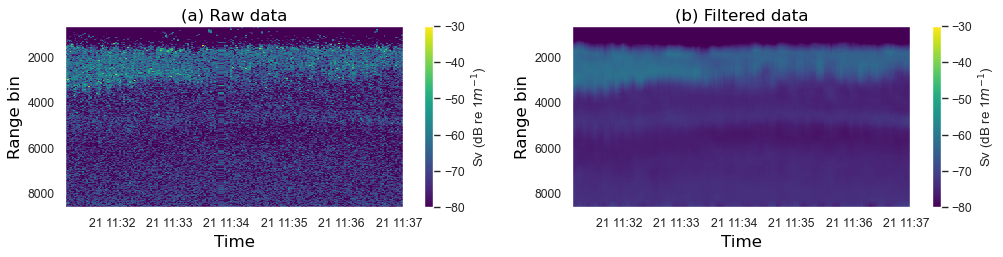

In [125]:
ds = cluster_SSL.get_backscatter(flist[nfile])
ds_s = cluster_SSL.smooth_backscatter(ds)

Wall time: 14.9 s


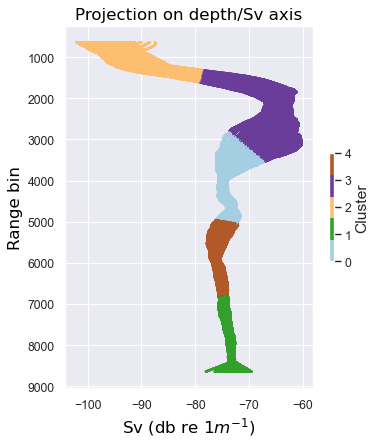

In [128]:
%%time
# select your amount of clusters, trial and error
# Simple strong SSL seem to need less clusters
nclusters = 5
res = cluster_SSL.cluster_backscatter(ds_s, factor=2, n_clusters=nclusters)

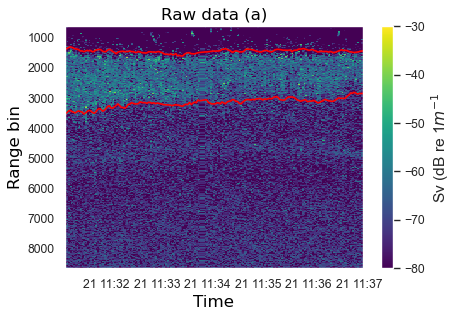

In [129]:
top_layer, bottom_layer = cluster_SSL.select_cluster(res,cluster_id=3)

## Write to file 
Select correct cluster amount and id is 

In [103]:
cluster_SSL.write_ssl(flist[nfile], ds, top_layer, bottom_layer, nclusters)